This is the KERAS CNN implementation for the MALARIA CELL IMAGES DATASET

Breakdown of this notebook:

Loading the dataset: Load the data and import the libraries.

In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import os
import cv2
from PIL import Image
# For CNN model creation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
SIZE = 64

In [2]:
infected = os.listdir('.\\cell_images\\cell_images\\Parasitized') 
uninfected = os.listdir('.\\cell_images\\cell_images\\Uninfected')

In [3]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread(".\\cell_images\\cell_images\\Parasitized\\"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(1, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread(".\\cell_images\\cell_images\\Uninfected\\"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')

labels = np.array(labels)

In [4]:
  x_train, x_test = train_test_split(data, test_size=0.2, random_state=1,shuffle = True)
  y_train, y_test = train_test_split(labels, test_size=0.2, random_state=1)
  print(np.array(x_train).shape)

(22046, 64, 64, 3)


In [5]:
regulization_list = [0, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10]
#regulization_list = np.logspace(-10,1,32)
#regulization_list = np.insert(regulization_list, 0, 0)

# probability axis values 
prob = []
# loss axis values 
loss = []
history = []
for i in regulization_list:
    classifier = tf.keras.Sequential()
    classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Flatten())
    classifier.add(Dense(activation = 'relu', units=512))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dense(activation = 'relu', units=256))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dense(kernel_regularizer=l1(i), activation = 'sigmoid', units=2))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    print(classifier.summary())

    history.append(classifier.fit(np.array(x_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 30, 
                         validation_split = 0.1,
                         shuffle = False))

    print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(x_test), np.array(y_test))[1]*100))
    loss.append(classifier.evaluate(np.array(x_test), np.array(y_test)))
    print(classifier.evaluate(np.array(x_test), np.array(y_test)))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

Epoch 8/30
19841/19841 - 3s - loss: 0.0509 - accuracy: 0.9783 - val_loss: 0.2154 - val_accuracy: 0.9365
Epoch 9/30
19841/19841 - 3s - loss: 0.0339 - accuracy: 0.9848 - val_loss: 0.2733 - val_accuracy: 0.9270
Epoch 10/30
19841/19841 - 3s - loss: 0.0347 - accuracy: 0.9842 - val_loss: 0.6494 - val_accuracy: 0.8227
Epoch 11/30
19841/19841 - 3s - loss: 0.0324 - accuracy: 0.9861 - val_loss: 0.2728 - val_accuracy: 0.9424
Epoch 12/30
19841/19841 - 3s - loss: 0.0206 - accuracy: 0.9909 - val_loss: 0.2787 - val_accuracy: 0.9370
Epoch 13/30
19841/19841 - 3s - loss: 0.0206 - accuracy: 0.9915 - val_loss: 1.6602 - val_accuracy: 0.6771
Epoch 14/30
19841/19841 - 3s - loss: 0.0158 - accuracy: 0.9935 - val_loss: 0.2183 - val_accuracy: 0.9569
Epoch 15/30
19841/19841 - 3s - loss: 0.0126 - accuracy: 0.9950 - val_loss: 0.2306 - val_accuracy: 0.9533
Epoch 16/30
19841/19841 - 3s - loss: 0.0074 - accuracy: 0.9965 - val_loss: 0.2904 - val_accuracy: 0.9478
Epoch 17/30
19841/19841 - 3s - loss: 0.0083 - accuracy: 0

5512/5512 [==============================] - 0s 81us/sample - loss: 0.3930 - accuracy: 0.9494
[0.3929711004642403, 0.94938314]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 32)        128 

Epoch 7/30
19841/19841 - 3s - loss: 0.0693 - accuracy: 0.9697 - val_loss: 2.4343 - val_accuracy: 0.5605
Epoch 8/30
19841/19841 - 3s - loss: 0.0525 - accuracy: 0.9761 - val_loss: 0.5932 - val_accuracy: 0.8041
Epoch 9/30
19841/19841 - 3s - loss: 0.0448 - accuracy: 0.9787 - val_loss: 0.6616 - val_accuracy: 0.8948
Epoch 10/30
19841/19841 - 3s - loss: 0.0420 - accuracy: 0.9800 - val_loss: 1.2097 - val_accuracy: 0.8245
Epoch 11/30
19841/19841 - 3s - loss: 0.0339 - accuracy: 0.9835 - val_loss: 0.2756 - val_accuracy: 0.9478
Epoch 12/30
19841/19841 - 3s - loss: 0.0256 - accuracy: 0.9884 - val_loss: 0.2422 - val_accuracy: 0.9515
Epoch 13/30
19841/19841 - 3s - loss: 0.0170 - accuracy: 0.9914 - val_loss: 0.4380 - val_accuracy: 0.9288
Epoch 14/30
19841/19841 - 3s - loss: 0.0172 - accuracy: 0.9918 - val_loss: 0.2710 - val_accuracy: 0.9469
Epoch 15/30
19841/19841 - 3s - loss: 0.0127 - accuracy: 0.9944 - val_loss: 0.2510 - val_accuracy: 0.9528
Epoch 16/30
19841/19841 - 3s - loss: 0.0142 - accuracy: 0.

5512/5512 [==============================] - 1s 95us/sample - loss: 0.3649 - accuracy: 0.9429
[0.36490219480172037, 0.94285196]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 14, 14, 32)        128

Epoch 6/30
19841/19841 - 3s - loss: 0.0871 - accuracy: 0.9638 - val_loss: 0.3418 - val_accuracy: 0.9270
Epoch 7/30
19841/19841 - 3s - loss: 0.0779 - accuracy: 0.9688 - val_loss: 0.2409 - val_accuracy: 0.9283
Epoch 8/30
19841/19841 - 3s - loss: 0.0568 - accuracy: 0.9763 - val_loss: 0.5013 - val_accuracy: 0.8354
Epoch 9/30
19841/19841 - 3s - loss: 0.0496 - accuracy: 0.9781 - val_loss: 0.7631 - val_accuracy: 0.7891
Epoch 10/30
19841/19841 - 3s - loss: 0.0404 - accuracy: 0.9820 - val_loss: 0.2637 - val_accuracy: 0.9442
Epoch 11/30
19841/19841 - 3s - loss: 0.0318 - accuracy: 0.9874 - val_loss: 0.2271 - val_accuracy: 0.9515
Epoch 12/30
19841/19841 - 3s - loss: 0.0255 - accuracy: 0.9894 - val_loss: 0.2601 - val_accuracy: 0.9429
Epoch 13/30
19841/19841 - 3s - loss: 0.0325 - accuracy: 0.9884 - val_loss: 0.4405 - val_accuracy: 0.9166
Epoch 14/30
19841/19841 - 3s - loss: 0.0208 - accuracy: 0.9927 - val_loss: 0.2530 - val_accuracy: 0.9420
Epoch 15/30
19841/19841 - 3s - loss: 0.0169 - accuracy: 0.9

Test_Accuracy: 94.97%
5512/5512 [==============================] - 1s 98us/sample - loss: 0.2509 - accuracy: 0.9497
[0.2508880752010382, 0.949746]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 14,

Epoch 6/30
19841/19841 - 3s - loss: 0.2784 - accuracy: 0.9635 - val_loss: 1.2739 - val_accuracy: 0.5211
Epoch 7/30
19841/19841 - 3s - loss: 0.2469 - accuracy: 0.9745 - val_loss: 0.3215 - val_accuracy: 0.9406
Epoch 8/30
19841/19841 - 3s - loss: 0.2200 - accuracy: 0.9813 - val_loss: 0.3769 - val_accuracy: 0.9188
Epoch 9/30
19841/19841 - 3s - loss: 0.1933 - accuracy: 0.9894 - val_loss: 0.2864 - val_accuracy: 0.9501
Epoch 10/30
19841/19841 - 3s - loss: 0.1758 - accuracy: 0.9928 - val_loss: 0.3104 - val_accuracy: 0.9361
Epoch 11/30
19841/19841 - 3s - loss: 0.1602 - accuracy: 0.9952 - val_loss: 0.3478 - val_accuracy: 0.9057
Epoch 12/30
19841/19841 - 3s - loss: 0.1464 - accuracy: 0.9969 - val_loss: 0.2683 - val_accuracy: 0.9469
Epoch 13/30
19841/19841 - 3s - loss: 0.1342 - accuracy: 0.9981 - val_loss: 0.2465 - val_accuracy: 0.9556
Epoch 14/30
19841/19841 - 3s - loss: 0.1251 - accuracy: 0.9989 - val_loss: 0.2407 - val_accuracy: 0.9533
Epoch 15/30
19841/19841 - 3s - loss: 0.1180 - accuracy: 0.9

Test_Accuracy: 95.19%
5512/5512 [==============================] - 1s 97us/sample - loss: 0.4787 - accuracy: 0.9519
[0.4786843783796612, 0.9519231]
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 1

In [6]:
print(loss)
print(regulization_list)
loss1 = []
accu = []
val_loss = []
val_accu = []
for i in loss:
    loss1.append(i[0])
    accu.append(i[1])
for k in history:
    val_accu.append(k.history['val_accuracy'][29])
    val_loss.append(k.history['val_loss'][29])
    

[[0.4054367088405704, 0.94756895], [0.3675842308934375, 0.93650216], [0.3929711004642403, 0.94938314], [0.35799414866541984, 0.9484761], [0.3373264105428221, 0.9301524], [0.36490219480172037, 0.94285196], [0.34287645648259274, 0.95174164], [0.2822302015652374, 0.94992745], [0.2508880752010382, 0.949746], [0.22470016621799357, 0.94756895], [0.2156853835018695, 0.9501088], [0.4786843783796612, 0.9519231], [1.293373516232251, 0.48349056]]
[0, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]


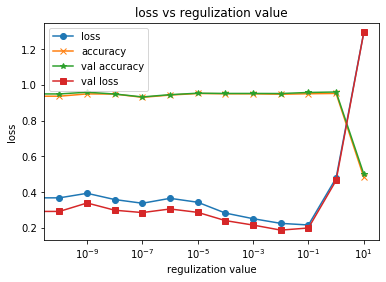

In [7]:
plt.semilogx(regulization_list, loss1,'o-',label='loss')
plt.semilogx(regulization_list, accu,'x-',label='accuracy')
plt.semilogx(regulization_list, val_accu,'*-',label='val accuracy')
plt.semilogx(regulization_list, val_loss,'s-',label='val loss')
plt.title('loss vs regulization value')
plt.xlabel('regulization value')
plt.ylabel('loss')
plt.legend()

In [8]:
print(history[1].history['val_loss'][29])

0.29156245510526796
